In [1]:
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split

# Create Dataset

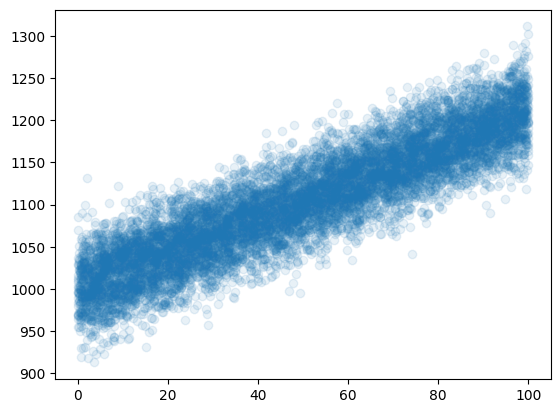

In [11]:
n = 10000
torch.manual_seed(42)

b0, b1 = 1000, 2.1
e = torch.normal(mean=0, std=30, size=(n,))

X = torch.distributions.Uniform(0, 100).sample(sample_shape=(n,))
y = b0 + b1*X + e

x_train, x_test, y_train, y_test = train_test_split(X, y)

plt.plot(X, y, marker='o', linestyle='', alpha=0.1);

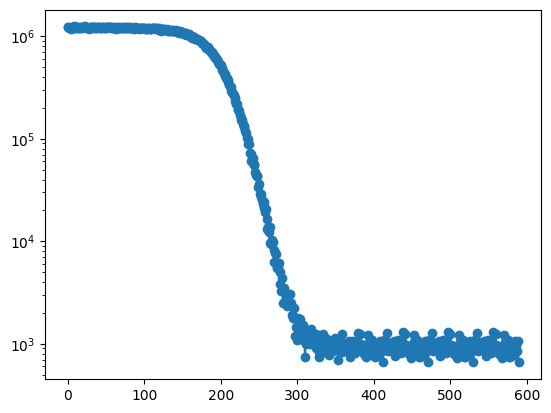

In [13]:
epochs = 10
lr = 1e-5
bs = 128

model = torch.nn.Sequential(
    torch.nn.BatchNorm1d(1),
    torch.nn.Linear(1, 1)
)

losses = []
for epoch in range(epochs):
    inds = torch.randperm(len(x_train))
    batches = [(x_train[i:i+bs], y_train[i:i+bs]) for i in range(0, len(x_train), bs)]
    for batch in batches:
        x, y = batch
        y_preds = model(x.unsqueeze(1)).squeeze()
        loss = (y_preds - y).pow(2).mean()
        losses.append(loss.item())
        loss.backward()
        with torch.no_grad():
            for param in model.parameters():
                param -= lr * param.grad
                param.grad.zero_()

plt.plot(losses, marker='o')
plt.yscale('log');

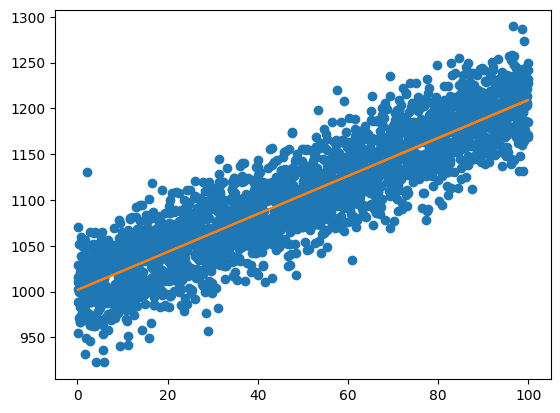

In [16]:
with torch.no_grad():
    y_pred = model(x_test.unsqueeze(1)).squeeze().detach()
plt.plot(x_test, y_test, marker='o', linestyle='None')
plt.plot(x_test, y_pred, marker='', linestyle='-')
plt.show()

## Doing math by hand for predictions:

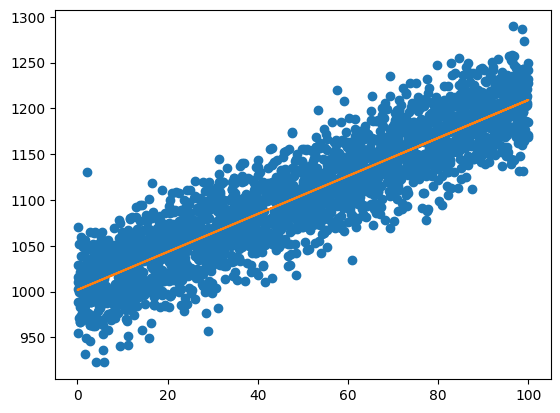

In [17]:
# Batch Norm Parameters
gamma, beta = model[0].weight.item(), model[0].bias.item()
# Linear Model Parameters
m, b = model[1].weight.item(), model[1].bias.item()

with torch.no_grad():
    normed = (x_test - x_test.mean()) / x_test.std() * gamma + beta
    y_pred = normed * m + b
plt.plot(x_test, y_test, marker='o', linestyle='None')
plt.plot(x_test, y_pred.squeeze().detach(), marker='', linestyle='-')
plt.show()